# Import libraries

In [1]:
import pandas as pd
import numpy as np
# importing required modules
from zipfile import ZipFile
#Extract text from PDF
# importing required modules 
import PyPDF2 
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import streamlit as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Test
test = pd.read_csv('test_x.csv')

In [3]:
#Train 1 data CSV
train = pd.read_csv('train.csv')

In [4]:
#Data shape CSV
print('shape train', train.shape)

shape train (7001, 10)


In [5]:
#Columns from train2
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7001 non-null   int64  
 1   Hour               7001 non-null   int64  
 2   Minutes            7001 non-null   int64  
 3   Sensor_alpha       7001 non-null   float64
 4   Sensor_beta        7001 non-null   float64
 5   Sensor_gamma       7001 non-null   float64
 6   Sensor_alpha_plus  7001 non-null   float64
 7   Sensor_beta_plus   7001 non-null   float64
 8   Sensor_gamma_plus  7001 non-null   float64
 9   Insect             7001 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 547.1 KB


# Background
## Los insectos nocturnos representan uno de los grupos más diversos de organismos, por lo que es de suma importancia estudiarlos.

Es por ello que un grupo de prestigiosos entomólogos han construido un ecosistema aislado con múltiples especies para poder estudiarlos en mayor detalle. Para este estudio están diseñando un sistema de sensores para poder trackear de forma automática las dinámicas y hábitos de estos insectos.

# El dataset de clientes 'train.csv' contiene las siguientes variables:

        Hour: Hora a la que se ha hecho la medición.

        Minutes: Minutos en los que se ha realizado la medición.

        Sensor_alpha: Posición del insecto al sensor alpha.

        Sensor_beta: Posición del insecto al sensor beta.

        Sensor_gamma: Posición del insecto al sensor gamma.

        Sensor_alpha_plus: Posición del insecto al sensor alpha+.

        Sensor_beta_plus: Posición del insecto al sensor beta+.

        Sensor_gamma_plus: Posición del insecto al sensor gamma+.

        Insect: Categoría de insecto.

                 ***   0 -> Lepidóptero
                 ***   1 -> himenópteros
                 ***   2 -> Dípteros

In [6]:
train.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7001 non-null   int64  
 1   Hour               7001 non-null   int64  
 2   Minutes            7001 non-null   int64  
 3   Sensor_alpha       7001 non-null   float64
 4   Sensor_beta        7001 non-null   float64
 5   Sensor_gamma       7001 non-null   float64
 6   Sensor_alpha_plus  7001 non-null   float64
 7   Sensor_beta_plus   7001 non-null   float64
 8   Sensor_gamma_plus  7001 non-null   float64
 9   Insect             7001 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 547.1 KB


In [8]:
train.columns = train.columns.str.replace('Unnamed: 0', 'index_train')
test.columns = test.columns.str.replace('Unnamed: 0', 'index_test')

In [9]:
train.Insect.unique()

array([2, 0, 1])

In [10]:
train.describe()

,index_train,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.00000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,3500.00000,19.598914,29.405942,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,2021.15895,3.507008,17.375830,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,0.00000,1.000000,0.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,1750.00000,19.000000,14.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,3500.00000,21.000000,29.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,5250.00000,21.000000,44.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,7000.00000,23.000000,59.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


In [11]:
#Check the null data
train.isnull().sum(axis=0)

index_train          0
Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64

In [12]:
#Remove columns with null values
train = train.dropna(axis=1)

# Categorical features

2022-05-23 19:39:13.408 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


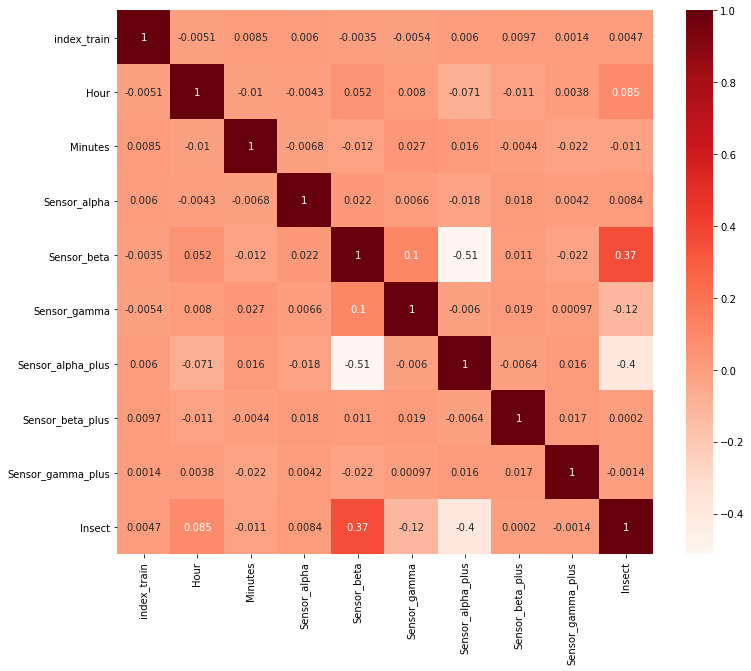

In [13]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(train["Insect"])

/Users/nancy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


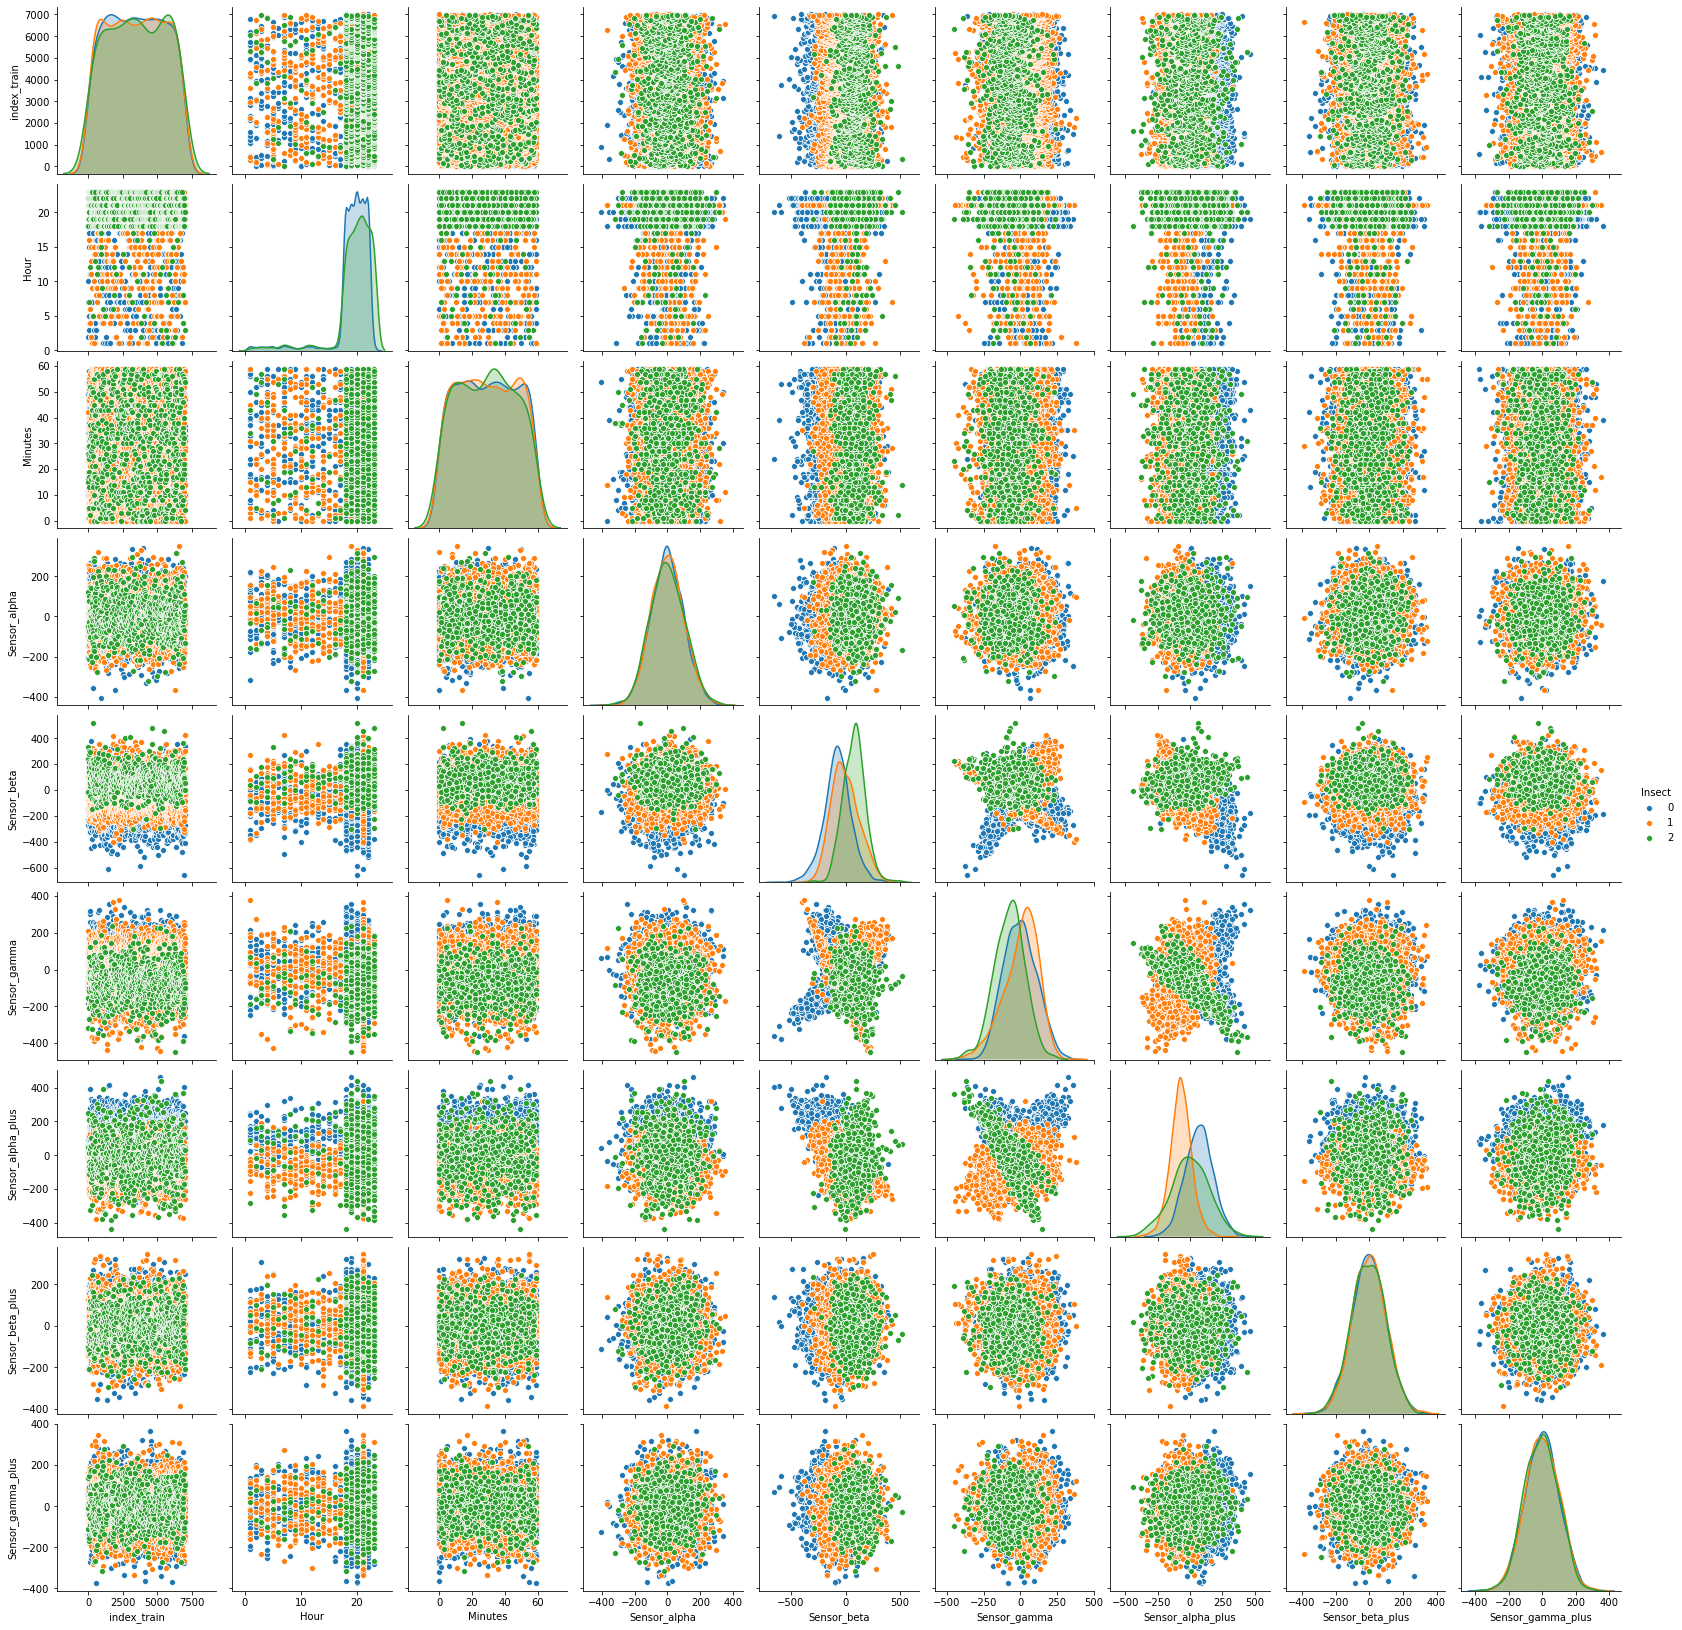

In [14]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(train.dropna(), hue='Insect');

In [15]:
#Loading the dataset
X_train = train.drop("Insect",1)   #Feature Matrix
y_train = train['Insect'].values   #Target Variable
train.head()

,index_train,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [16]:
train.shape

(7001, 10)

In [17]:
test.shape

(3000, 9)

In [18]:
X_train = X_train.to_numpy()
X_train

array([[ 0.00000000e+00,  2.20000000e+01,  2.60000000e+01, ...,
         2.50195048e+02, -5.35477774e+01, -1.12049983e+02],
       [ 1.00000000e+00,  1.00000000e+01,  1.60000000e+01, ...,
         9.53949414e+01,  3.72919441e+01,  4.85251800e+01],
       [ 2.00000000e+00,  2.10000000e+01,  4.20000000e+01, ...,
        -9.07503862e+01, -5.04765557e+01,  8.53990087e+01],
       ...,
       [ 6.99800000e+03,  2.20000000e+01,  4.70000000e+01, ...,
         2.48745127e+02,  1.16893077e+02,  3.28061501e+01],
       [ 6.99900000e+03,  1.80000000e+01,  1.40000000e+01, ...,
         3.87285646e+01, -3.90504657e+01,  2.03567109e+01],
       [ 7.00000000e+03,  2.10000000e+01,  3.10000000e+01, ...,
        -7.26963849e+01,  1.45299227e+02, -1.43856243e+02]])

In [19]:
print('Train columns', len(train.columns.to_list()))
print('Test columns', len(test.columns.to_list()))

Train columns 10
Test columns 9


In [20]:
#Array X test
X_test = test.to_numpy()
X_test

array([[ 7.00000000e+03,  2.10000000e+01,  3.10000000e+01, ...,
        -7.26963849e+01,  1.45299227e+02, -1.43856243e+02],
       [ 7.00100000e+03,  2.10000000e+01,  3.00000000e+00, ...,
        -2.62668015e+01, -1.25391237e+02,  8.09049733e+01],
       [ 7.00200000e+03,  2.20000000e+01,  3.10000000e+01, ...,
         1.82136746e+02, -9.72695106e+00, -1.14913402e+02],
       ...,
       [ 9.99700000e+03,  2.10000000e+01,  0.00000000e+00, ...,
        -1.64294768e+02, -2.69930643e+01,  6.06371544e+00],
       [ 9.99800000e+03,  2.00000000e+01,  1.30000000e+01, ...,
         1.13538235e+01, -3.36600697e+00, -1.40113661e+02],
       [ 9.99900000e+03,  1.90000000e+01,  1.70000000e+01, ...,
         1.97558808e+02, -4.48479812e+01,  1.42537872e+02]])

In [21]:
#The class labels (pollutant type: 0,1,2)
y_train

array([2, 0, 1, ..., 0, 0, 1])

# Logistic Regression

In [22]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [23]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions using the testing set
insects_y_pred = regr.predict(X_test)

In [25]:
print('Precisión LR: {}'.format(regr.score(X_train, y_train)))

Precisión LR: 0.2187833763805317


# K-NN

In [26]:
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred_knn = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.8075989144407941


In [27]:
#Create a dataframe with column named pollutant
test_prediction_knn = pd.DataFrame(Y_pred_knn, columns=['Insect'])
test_prediction_knn.Insect = test_prediction_knn.Insect.astype(int)
#Renamed the index
test_prediction_knn.index.name = 'test_index'
#Save test predictions CSV
test_prediction_knn.to_csv('results.csv')

In [28]:
test_prediction_knn.Insect.unique()

array([0, 1, 2])

# Random Forest

In [29]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
print('Precisión Random Forest Clasificación: {}'.format(clf_RF.score(X_train, y_train)))

Precisión Random Forest Clasificación: 1.0


In [30]:
Y_pred_RF = clf_RF.predict(X_test)

In [35]:
#Create a dataframe with column named pollutant
test_prediction_dt = pd.DataFrame(Y_pred_RF, columns=['Insect'])
test_prediction_dt.Insect = test_prediction_dt.Insect.astype(int)
#Renamed the index
test_prediction_dt.index.name = 'test_index'
#Save test predictions CSV
test_prediction_dt.to_csv('results_RF.csv')

In [38]:
test_prediction_dt

,Insect
test_index,
0,1
1,1
2,0
3,2
4,0
...,...
2995,1
2996,0
2997,1


# Decision Tree classifier criterion='entropy'


In [39]:
clf_DT = DecisionTreeClassifier(criterion = 'entropy')
#Training the decision tree classifier. 
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
print('Precisión Decision Tree Clasificación: {}'.format(clf_DT.score(X_train, y_train)))

Precisión Decision Tree Clasificación: 1.0


In [41]:
#Predicting labels on the test set.
y_pred =  clf_DT.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 2])

In [42]:
#Create a dataframe with column named pollutant
test_prediction = pd.DataFrame(y_pred, columns=['Insect'])
test_prediction.Insect = test_prediction.Insect.astype(int)

In [43]:
#Renamed the index
test_prediction.index.name = 'test_index'
#Save test predictions CSV
test_prediction.to_csv('results_DT.csv')